In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [2]:
import numpy as np
import os
import gzip

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
tf.__version__

'2.0.0'

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


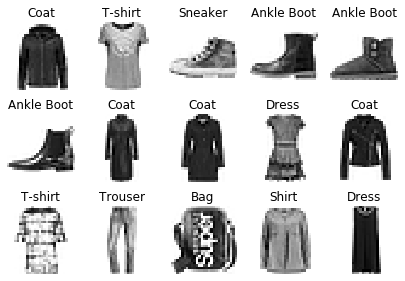

In [11]:
# 定义加载数据的函数，data_folder为保存gz数据的文件夹，该文件夹下有4个文件
# 'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
# 't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'

def load_data(data_folder):

  files = [
      'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
      't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'
  ]

  paths = []
  for fname in files:
    paths.append(os.path.join(data_folder,fname))

  with gzip.open(paths[0], 'rb') as lbpath:
    y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[1], 'rb') as imgpath:
    x_train = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

  with gzip.open(paths[2], 'rb') as lbpath:
    y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[3], 'rb') as imgpath:
    x_test = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

  return (x_train, y_train), (x_test, y_test)

(x_train_all, y_train_all), (x_test, y_test) = load_data('F:\\2、Deep Learning\Tensorflow\Keras_datasets\Fashion-MNIST')
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

def show_single_image(image_arr):
    plt.imshow(image_arr, cmap='binary')
    plt.show()

def show_images(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap='binary', interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# show_single_image(x_train[0])

show_images(3, 5, x_train, y_train, class_names)

In [14]:
model =keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# reason for sparse: y_valid是一个长度为样本数目的向量，每个元素只是一个值 y->index
# 损失函数值，需要y->one_hot->向量[]  y：一个数->sparse；向量->categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


In [15]:
model.layers
model.summary()
# 28*28（n_x） * 300（w） + 300（b）

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 108us/sample - loss: 2.2025 - accuracy: 0.7069 - val_loss: 0.6656 - val_accuracy: 0.7800
Epoch 2/10
55000/55000 [==============================] - 5s 99us/sample - loss: 0.6254 - accuracy: 0.7774 - val_loss: 0.6037 - val_accuracy: 0.7994
Epoch 3/10
55000/55000 [==============================] - 5s 99us/sample - loss: 0.5434 - accuracy: 0.8130 - val_loss: 0.5302 - val_accuracy: 0.8254
Epoch 4/10
55000/55000 [==============================] - 5s 100us/sample - loss: 0.4860 - accuracy: 0.8315 - val_loss: 0.4739 - val_accuracy: 0.8360
Epoch 5/10
55000/55000 [==============================] - 5s 100us/sample - loss: 0.4523 - accuracy: 0.8434 - val_loss: 0.4202 - val_accuracy: 0.8556
Epoch 6/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.4238 - accuracy: 0.8531 - val_loss: 0.4225 - val_accuracy: 0.8630
Epoch 7/10
55000/55000 [==============================

In [17]:
type(history)
history.history

tensorflow.python.keras.callbacks.History

{'loss': [2.202534871534868,
  0.6253964242891832,
  0.5434250250296159,
  0.486012578756159,
  0.45231470381129874,
  0.42377243581251667,
  0.4067491010362452,
  0.3919289399797266,
  0.37767435959469187,
  0.36617258715846324],
 'accuracy': [0.7069455,
  0.77736366,
  0.8130182,
  0.83149093,
  0.84343636,
  0.8530727,
  0.85594547,
  0.8622,
  0.8656727,
  0.8714182],
 'val_loss': [0.6655889184474945,
  0.6037416193008422,
  0.5301563239336013,
  0.4739234347581863,
  0.4202491863489151,
  0.4225182171344757,
  0.4138999594092369,
  0.4090202243566513,
  0.43906693489551546,
  0.42034772386550906],
 'val_accuracy': [0.78,
  0.7994,
  0.8254,
  0.836,
  0.8556,
  0.863,
  0.8594,
  0.8736,
  0.8594,
  0.8646]}

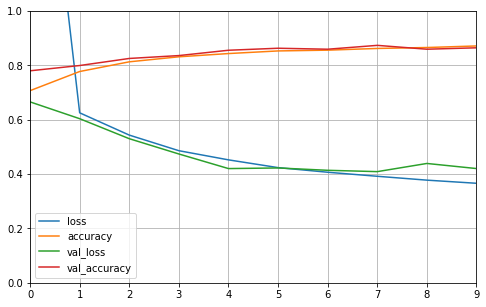

In [18]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid()
    plt.ylim(0, 1)
    plt.show()
plot_learning_curve(history)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 108us/sample - loss: 2.1730 - accuracy: 0.7240 - val_loss: 0.6466 - val_accuracy: 0.7918
Epoch 2/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.5822 - accuracy: 0.7932 - val_loss: 0.5682 - val_accuracy: 0.8088
Epoch 3/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.5246 - accuracy: 0.8156 - val_loss: 0.5237 - val_accuracy: 0.8156
Epoch 4/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.4806 - accuracy: 0.8347 - val_loss: 0.4616 - val_accuracy: 0.8430
Epoch 5/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.4492 - accuracy: 0.8437 - val_loss: 0.4837 - val_accuracy: 0.8312
Epoch 6/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.4267 - accuracy: 0.8521 - val_loss: 0.4518 - val_accuracy: 0.8466
Epoch 7/10
55000/55000 [==============================] 

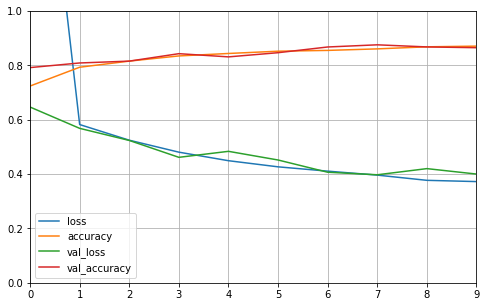

In [22]:
# 简化写法

model2 =keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))
plot_learning_curve(history2)